In [61]:
import pickle

# Data wrangling
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Pipelines: Tratar dados Futuros
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Validação de modelos:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


# Pré processamento para incluir pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# Modelos:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Manter saída do processamento do Sklearn com DataFrame pandas
from sklearn  import set_config
set_config(transform_output="pandas")

In [36]:
def metrics(y_true, y_predict):
    dict_metrics = {
        "R2": metrics.r2_score(y_true, y_predict),
        "MAE": metrics.mean_absolute_error(y_true, y_predict),
        "MAPE": metrics.mean_absolute_percentage_error(y_true, y_predict),
        "RMSE": np.sqrt(metrics.mean_square_error(y_true,y_predict))
    }
    return dict_metrics

In [4]:
df = pd.read_csv('../data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df = df.drop_duplicates()

In [9]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='charges'>

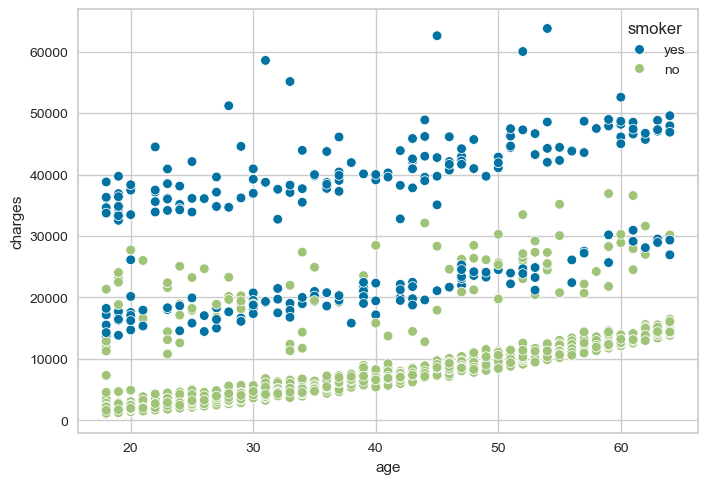

In [11]:
sns.scatterplot(x='age', y='charges', data = df, hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

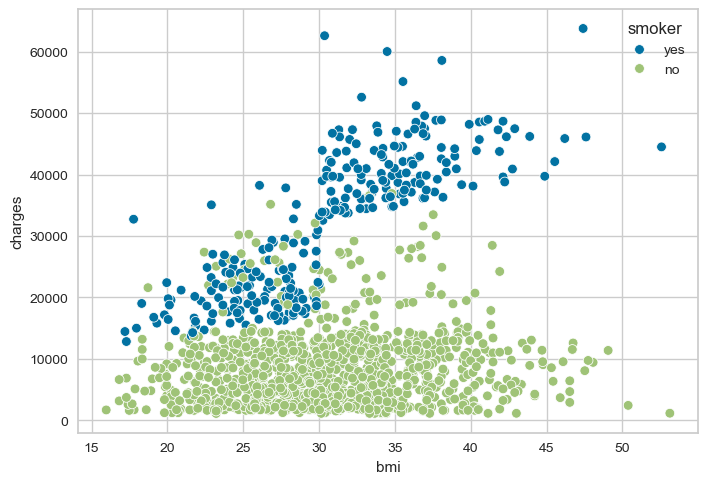

In [12]:
sns.scatterplot(x='bmi', y='charges', data = df, hue='smoker')

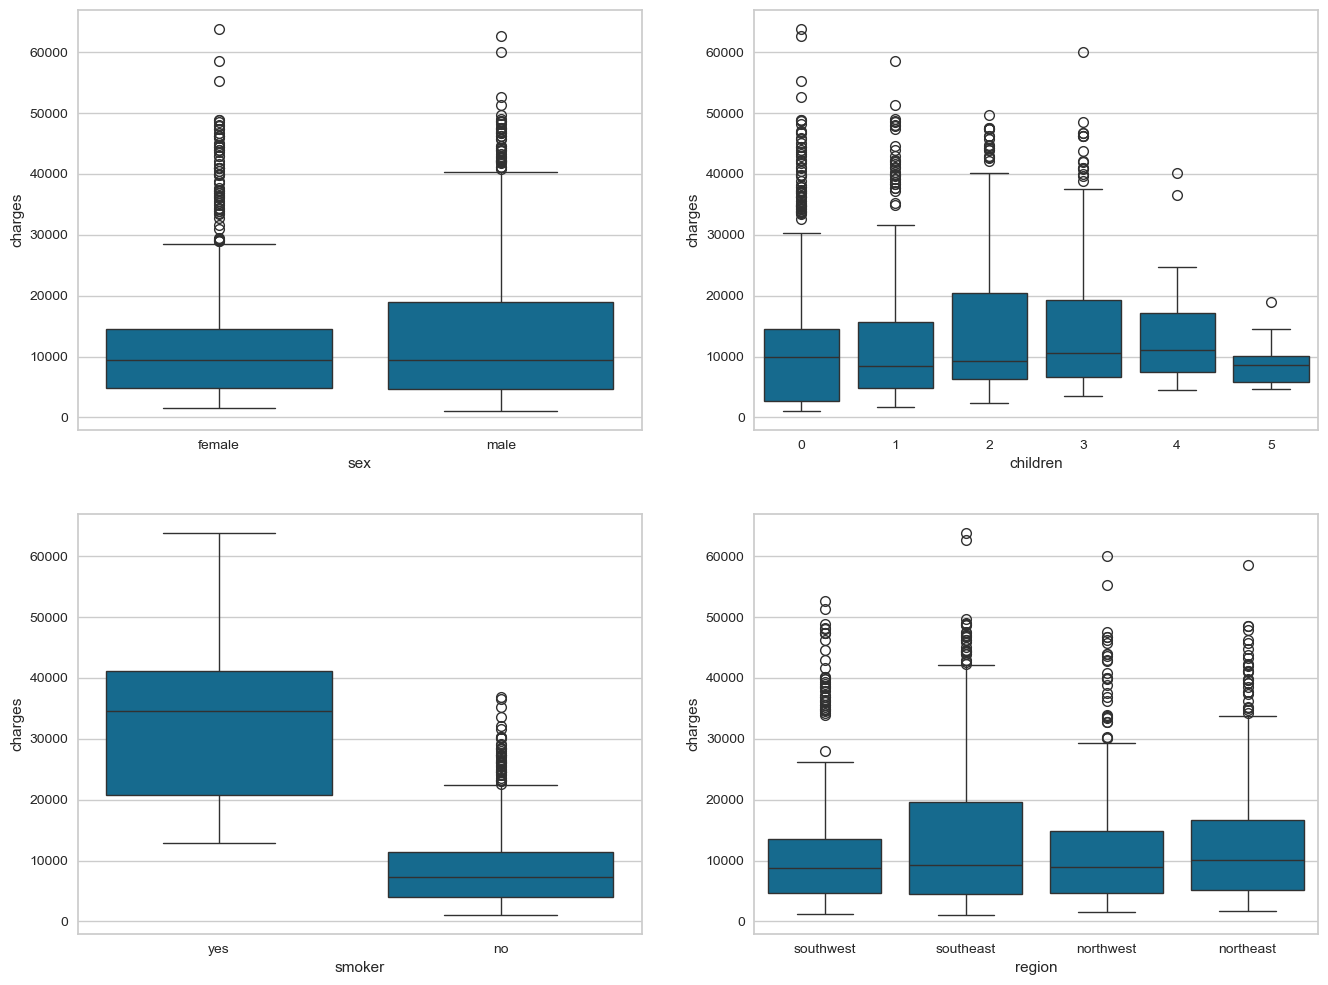

In [13]:
cat_plot_col= [
    'sex',
    'children',
    'smoker',
    'region'
]

f,axes = plt.subplots(nrows=2, ncols=2, figsize = (16,12))
for col,ax in zip (cat_plot_col,axes.flatten()):
    sns.boxplot(x=col, y='charges', data = df, ax = ax)

<Axes: >

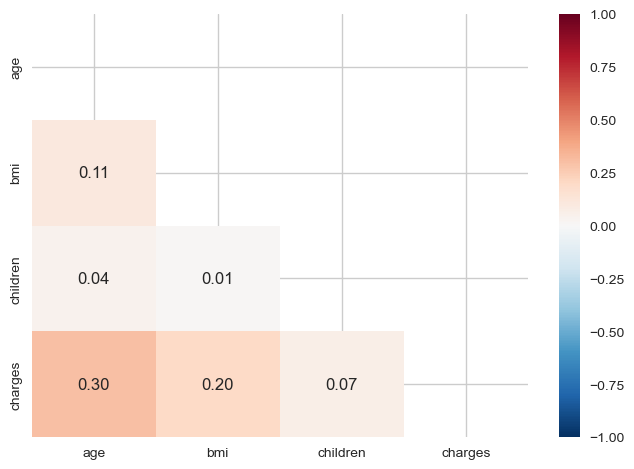

In [14]:
dfc = df.corr(numeric_only=True)
mask = np.zeros(dfc.shape).astype(bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(dfc, annot=True, fmt='.2f', center = 0 ,vmax= 1, vmin= -1, cmap='RdBu_r', mask= mask)

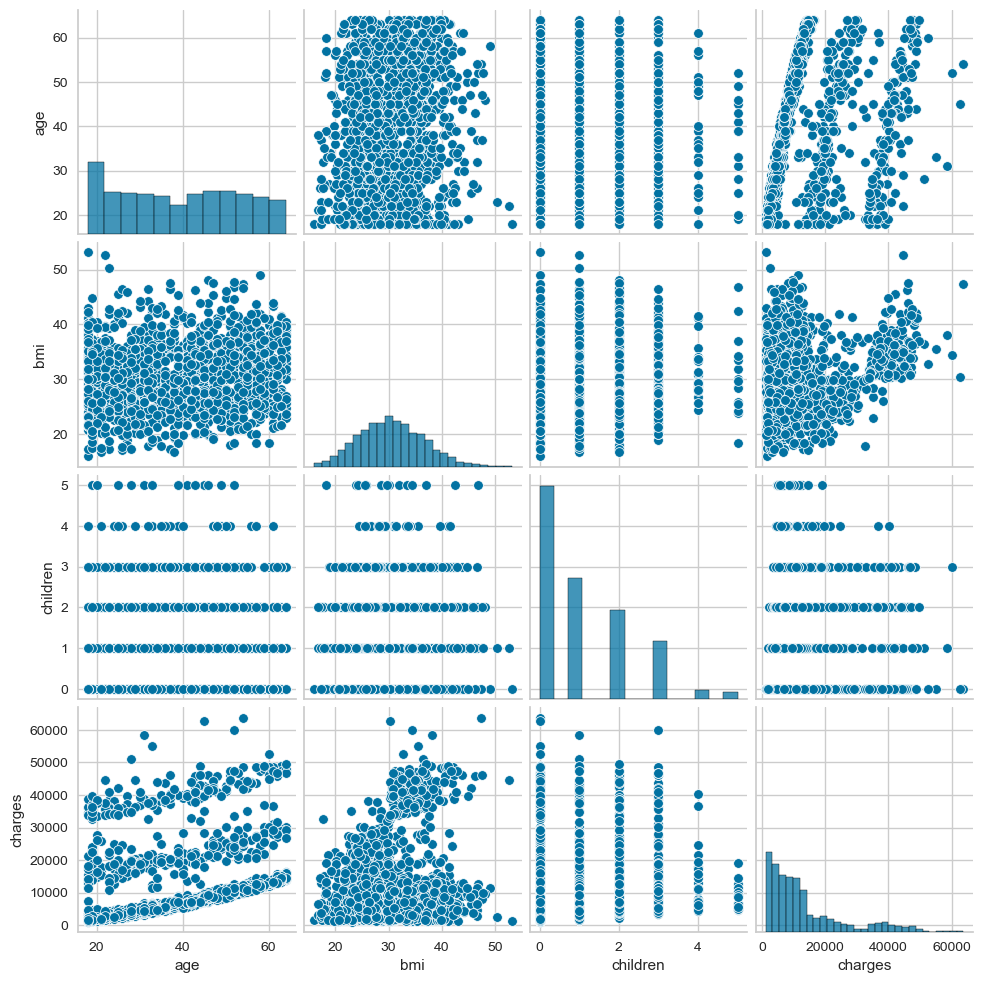

In [15]:
sns.pairplot(df)

# Modeling

In [16]:
NUMERICAL_FEATURES = [
    'age',
    'bmi',
    'children'
]

CATEGORICAL_FEATURES= [
    'sex',
    'smoker',
    'region',
]

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

In [17]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test , y_train , y_test = train_test_split(X,y , test_size= 0.2, random_state= 2023)

In [18]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer =  OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

preprocessor.fit_transform(X_train)

,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
1252,0.043478,0.305085,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1052,0.673913,0.373150,0.2,1.0,0.0,1.0,0.0,0.0,0.0
1257,0.782609,0.314366,0.2,0.0,0.0,0.0,1.0,0.0,0.0
850,0.413043,0.398709,0.0,0.0,1.0,1.0,0.0,0.0,0.0
493,0.934783,0.738230,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
885,0.304348,0.348937,0.2,1.0,1.0,0.0,0.0,1.0,0.0
515,0.869565,0.531073,0.0,1.0,0.0,0.0,0.0,0.0,1.0
696,0.760870,0.439602,0.4,0.0,0.0,1.0,0.0,0.0,0.0
454,0.304348,0.822437,0.4,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
model_pepiline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',DummyRegressor())
])
model_pepiline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DummyRegressor())])

In [20]:
params = {
    'model': [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        RandomForestRegressor(random_state= 2023),
        GradientBoostingRegressor(random_state= 2023),
    ]
}

grid_model = GridSearchCV(model_pepiline, params, cv=5 , scoring= 'r2', verbose=1)
grid_model.fit(X_train, y_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [21]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', GradientBoostingRegressor(random_state=2023))])

In [22]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')]

,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,
1,GradientBoostingRegressor(random_state=2023),{'model': GradientBoostingRegressor(random_sta...,0.850965,0.017636
2,RandomForestRegressor(random_state=2023),{'model': RandomForestRegressor(random_state=2...,0.834671,0.025859
3,LassoCV(),{'model': LassoCV()},0.747473,0.021210
4,RidgeCV(),{'model': RidgeCV()},0.747450,0.021178
5,LinearRegression(),{'model': LinearRegression()},0.747434,0.021195
6,DummyRegressor(),{'model': DummyRegressor()},-0.007882,0.007010


In [23]:
model_pepiline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2023))
])

params= {
    "model__learning_rate": [0.1, 0.01],
    "model__max_depth": [3,4,5],
    'model__n_estimators': [300,400,500],
    "model__subsample": [1., .8],
}

grid_model = GridSearchCV(model_pepiline, params, cv=5, scoring='r2', n_jobs=-1, verbose= 1)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2023))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

In [24]:
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')]

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856668,0.020264
2,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856625,0.020355
3,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855563,0.020386
4,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855263,0.020405
5,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855234,0.020010
6,0.01,3,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.854740,0.020572
7,0.01,4,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.851413,0.020649
8,0.01,4,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.851138,0.020909
9,0.01,4,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.850519,0.021359


In [25]:
model_pepiline = grid_model.best_estimator_

In [37]:
y_pred = model_pepiline.predict(X_test)
get_metrics(y_test,y_pred)

{'R2': 0.857889398098628,
 'MAE': 2576.4453257288174,
 'MAPE': 0.29970342514423526,
 'RMSE': 4512.28217602391}

<Axes: xlabel='charges'>

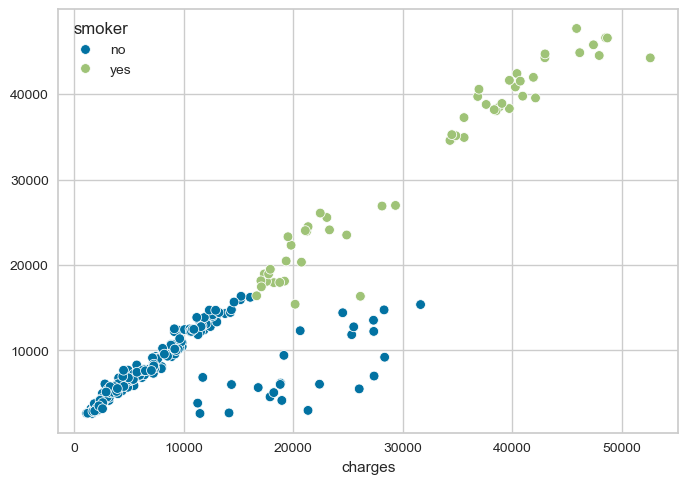

In [38]:
sns.scatterplot(x= y_test, y= y_pred, hue= X_test.smoker)

In [49]:
importances = pd.Series(
    data=model_pepiline.named_steps['model'].feature_importances_,
    index =model_pepiline.named_steps['preprocessor'].get_feature_names_out()
)

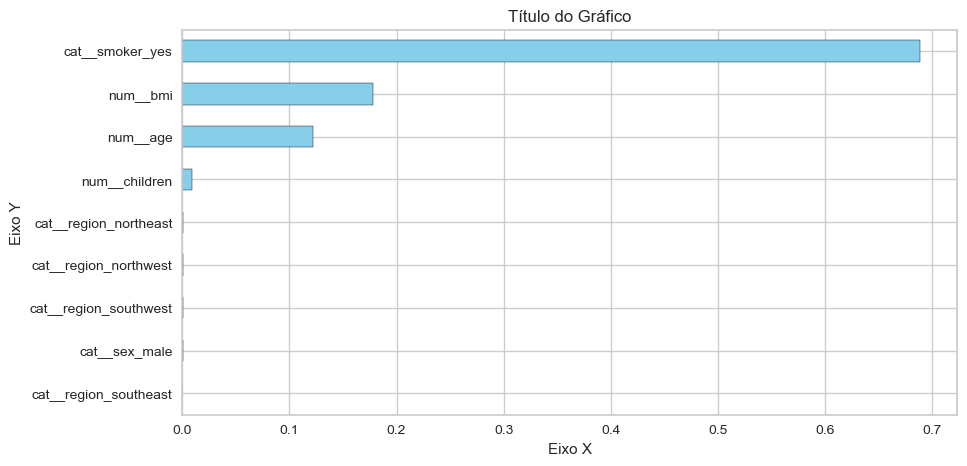

In [51]:
importances.sort_values().plot.barh(figsize=(10, 5), color="skyblue", edgecolor="black")
plt.title("Título do Gráfico")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

In [53]:
NUMERICAL_FEATURES = [
    'age',
    'bmi',
    'children'
]

CATEGORICAL_FEATURES= [
    'smoker',
]

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

X= df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2, random_state=2023)

In [56]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer =  OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

model_pepiline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=2023))
])

params= {
    "model__learning_rate": [0.1, 0.01],
    "model__max_depth": [3,4,5],
    'model__n_estimators': [300,400,500],
    "model__subsample": [1., .8],
}

grid_model = GridSearchCV(model_pepiline, params, cv=5, scoring='r2', n_jobs=-1, verbose= 1)
grid_model.fit(X_train, y_train)

df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')].head()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.856188,0.019866
2,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855664,0.020148
3,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855388,0.019447
4,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.855369,0.020118
5,0.01,3,300,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.854990,0.020350


In [58]:
model_pepiline = grid_model.best_estimator_
y_pred = model_pepiline.predict(X_test)

get_metrics(y_test,y_pred)

{'R2': 0.8554122646716931,
 'MAE': 2584.9716282068453,
 'MAPE': 0.30131642568565226,
 'RMSE': 4551.439128025427}

In [59]:
importances = pd.Series(
    data=model_pepiline.named_steps['model'].feature_importances_,
    index =model_pepiline.named_steps['preprocessor'].get_feature_names_out()
)

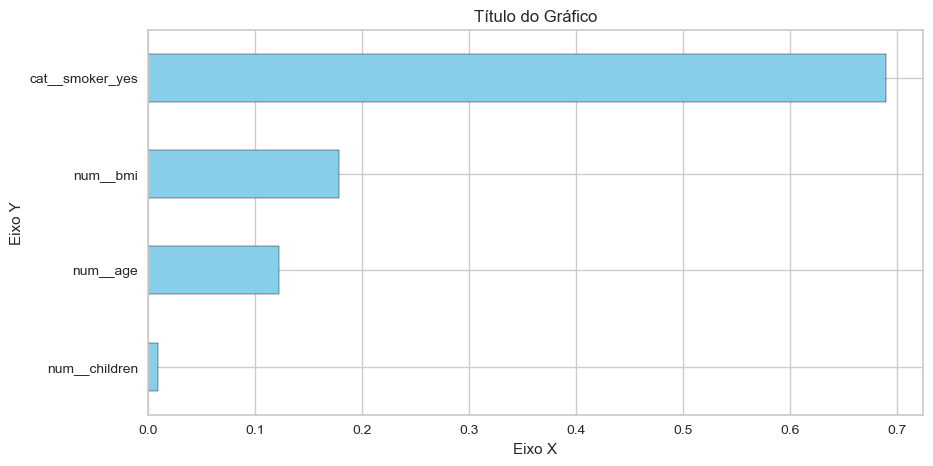

In [60]:
importances.sort_values().plot.barh(figsize=(10, 5), color="skyblue", edgecolor="black")
plt.title("Título do Gráfico")
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

In [62]:
with open('../models/model.pkl', 'wb') as file_model:
    pickle.dump(model_pepiline, file_model )